### Imports

In [7]:
import pandas as pd
from pathlib import Path
import seaborn as sb
import numpy as np
from matplotlib import pyplot as plt
import hyspexutil.features.bandutil459 as bu
import hyspexutil.data.datautil459 as du

In [8]:
outdir_figs = Path("../Figures/")

### Load data - example: single file

In [9]:
filepath = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_02_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth")
spectra_df = pd.read_feather(filepath)
spectra_df

,x,y,1,2,3,4,5,6,7,8,...,450,451,452,453,454,455,456,457,458,459
0,434520.0,7178312.0,0.0,40.0,1.0,0.0,10.0,16.0,9.0,99.0,...,543.0,206.0,1925.0,4038.0,177.0,277.0,15000.0,6177.0,14263.0,15000.0
1,434547.0,7182759.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,716.0,84.0,78.0,177.0,5043.0,448.0,1198.0,884.0,15000.0
2,434568.0,7175615.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,444.0,537.0,1845.0,2488.0,4414.0,8398.0,15000.0,5799.0,13036.0,12053.0
3,434574.0,7181832.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,859.0,800.0,1173.0,1171.0,2210.0,8807.0,12030.0,421.0,971.0,390.0
4,434574.0,7182653.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,140.0,128.0,1894.0,292.0,2506.0,961.0,11718.0,3565.0,3210.0,1549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,435651.0,7175093.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,...,987.0,411.0,8.0,407.0,17.0,27.0,6885.0,20.0,7805.0,5500.0
996,435653.0,7176429.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,45.0,...,309.0,756.0,1356.0,99.0,3842.0,7.0,10924.0,2363.0,8.0,12.0
997,435658.0,7175123.0,14.0,0.0,0.0,9.0,16.0,25.0,58.0,44.0,...,57.0,985.0,2433.0,2425.0,110.0,8402.0,4336.0,1508.0,14993.0,64.0
998,435660.0,7175115.0,0.0,0.0,0.0,3.0,0.0,0.0,12.0,83.0,...,1294.0,1382.0,2129.0,0.0,1.0,10992.0,4.0,6667.0,3.0,11515.0


Extract just the spectral data for all bands, replacing values > 10000 (100%) with zero

In [10]:
def extract_spectra(df, startskip=0, endskip=0):
    end = len(df.columns)
    spectra_forcorr = df.loc[:, df.columns[startskip:end+1-endskip]]
    return spectra_forcorr.where(spectra_forcorr < 10000, 0.0)

In [11]:
spectra_forcorr = extract_spectra(spectra_df)
spectra_forcorr

,x,y,1,2,3,4,5,6,7,8,...,450,451,452,453,454,455,456,457,458,459
0,0.0,0.0,0.0,40.0,1.0,0.0,10.0,16.0,9.0,99.0,...,543.0,206.0,1925.0,4038.0,177.0,277.0,0.0,6177.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,60.0,716.0,84.0,78.0,177.0,5043.0,448.0,1198.0,884.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,444.0,537.0,1845.0,2488.0,4414.0,8398.0,0.0,5799.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,859.0,800.0,1173.0,1171.0,2210.0,8807.0,0.0,421.0,971.0,390.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0,...,140.0,128.0,1894.0,292.0,2506.0,961.0,0.0,3565.0,3210.0,1549.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,...,987.0,411.0,8.0,407.0,17.0,27.0,6885.0,20.0,7805.0,5500.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,45.0,...,309.0,756.0,1356.0,99.0,3842.0,7.0,0.0,2363.0,8.0,12.0
997,0.0,0.0,14.0,0.0,0.0,9.0,16.0,25.0,58.0,44.0,...,57.0,985.0,2433.0,2425.0,110.0,8402.0,4336.0,1508.0,0.0,64.0
998,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,12.0,83.0,...,1294.0,1382.0,2129.0,0.0,1.0,0.0,4.0,6667.0,3.0,0.0


In [12]:
sb.set(rc = {'figure.figsize':(10,8)})
sb.set_context("poster")
sb.set_style("whitegrid") 

Text(0.65, 0.8, 'Pairwise correlation\n between HySpex bands')

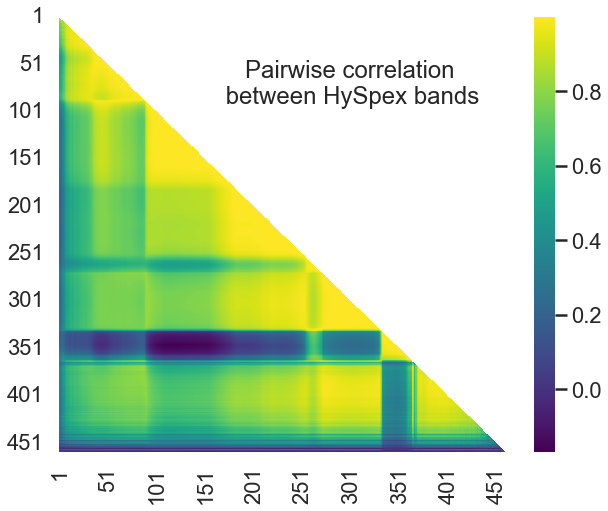

In [ ]:
corr = spectra_forcorr.drop(columns=['x', 'y']).corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
ax = sb.heatmap(corr, cmap='viridis', mask=mask)
ticks = np.arange(0, len(corr.columns), 50)
ticklabels = corr.columns[ticks]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_yticklabels(ticklabels)
ax.text(.65,.8,"Pairwise correlation\n between HySpex bands",
        horizontalalignment='center',
        transform=ax.transAxes)

Band-to-band correlation for single file

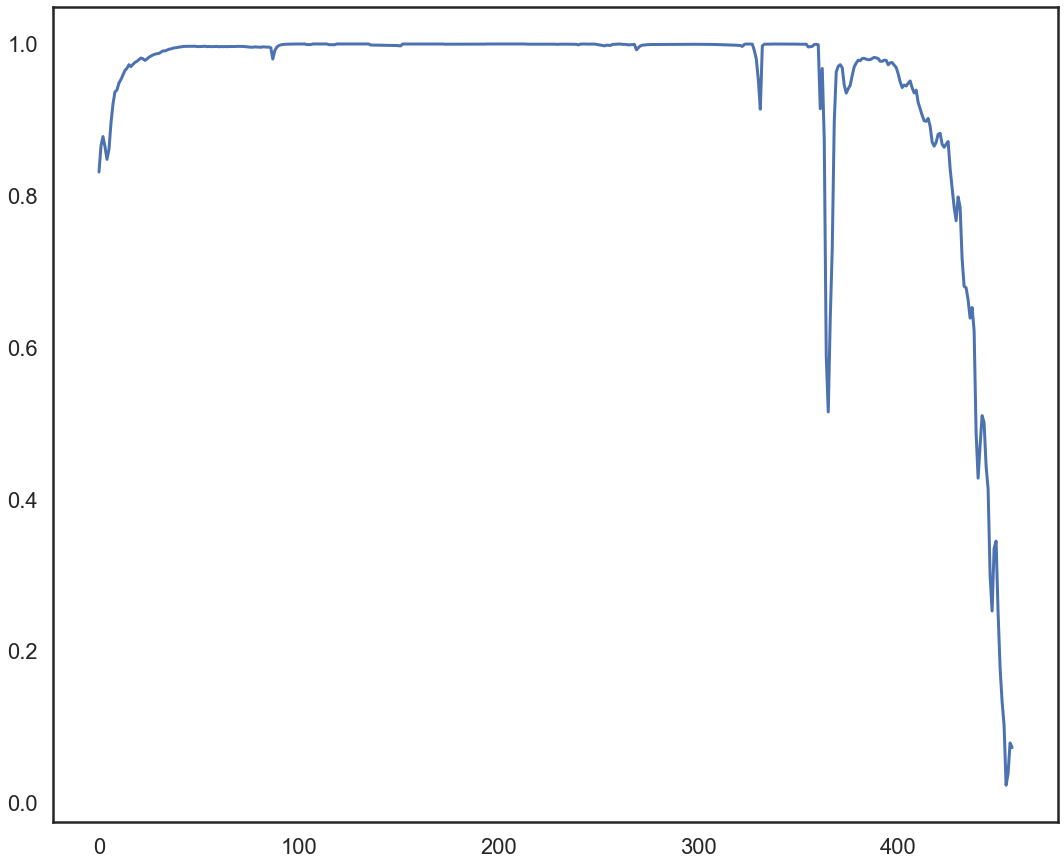

In [ ]:
bd2bdcorr = [corr[2:].drop(columns=['x','y']).values[ii, ii+1] for ii in range(len(spectra_df.columns)-3)]
plt.plot(bd2bdcorr)

----

### now for all the files 

In [13]:
datadir = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/")
datafiles = datadir.glob("*.fth") 
datafiles = list(datafiles)
datafiles

[PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_03_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_01_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_02_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_04_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_05_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/20200830-BC_06_VNIR_SWIR_rad_geo_atm_bcor_crop_samplespectra.fth'),
 PosixPath('/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extract

In [14]:
dflist = [pd.read_feather(fn) for fn in datafiles]

dflist = list(map(extract_spectra, dflist))
full_df = pd.concat(dflist)
full_df

,x,y,1,2,3,4,5,6,7,8,...,450,451,452,453,454,455,456,457,458,459
0,0.0,0.0,9.0,31.0,0.0,0.0,38.0,25.0,82.0,84.0,...,432.0,252.0,2501.0,734.0,606.0,4646.0,7003.0,2766.0,167.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,...,536.0,229.0,0.0,220.0,1.0,8130.0,1736.0,2824.0,8569.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,6.0,...,640.0,1159.0,254.0,276.0,1.0,2.0,2.0,0.0,2.0,7615.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,40.0,...,80.0,231.0,554.0,401.0,2617.0,6928.0,7326.0,1.0,5828.0,7656.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,26.0,...,176.0,243.0,971.0,0.0,640.0,3.0,4276.0,2155.0,3.0,9640.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,168.0,164.0,165.0,177.0,151.0,186.0,224.0,235.0,...,929.0,2683.0,1.0,4458.0,7.0,19.0,37.0,0.0,0.0,39.0
996,0.0,0.0,107.0,116.0,147.0,163.0,184.0,191.0,196.0,250.0,...,0.0,1598.0,3086.0,172.0,7.0,18.0,36.0,10.0,20.0,40.0
997,0.0,0.0,81.0,107.0,59.0,82.0,104.0,110.0,133.0,128.0,...,777.0,267.0,0.0,0.0,7143.0,18.0,35.0,10.0,0.0,38.0
998,0.0,0.0,1.0,15.0,0.0,17.0,51.0,16.0,40.0,74.0,...,0.0,1.0,2210.0,3533.0,6.0,0.0,29.0,8.0,0.0,32.0


In [15]:
corr_full = full_df.drop(columns=['x', 'y']).corr().abs()

Text(50.5, 0.5, 'band #')

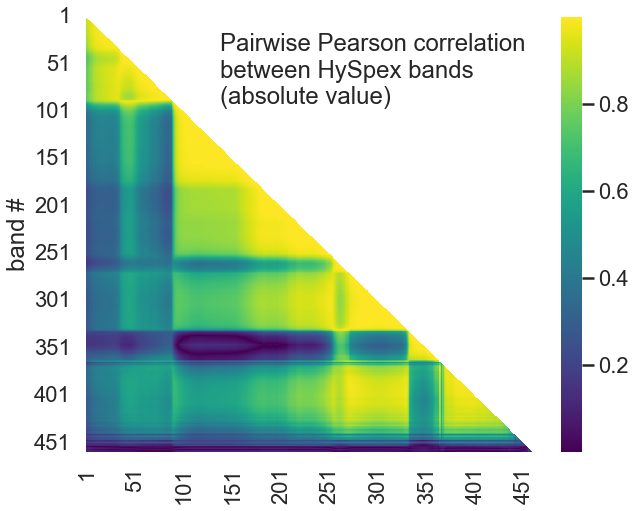

In [16]:
fig, ax = plt.subplots()
mask = np.triu(np.ones_like(corr_full, dtype=bool))
ax = sb.heatmap(corr_full, cmap='viridis', mask=mask)
ticks = np.arange(0, len(corr_full.columns), 50)
ticklabels = corr_full.columns[ticks]
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(ticklabels)
ax.set_yticklabels(ticklabels)
ax.text(.3,.8,"Pairwise Pearson correlation\nbetween HySpex bands\n(absolute value)",
        horizontalalignment='left',
        transform=ax.transAxes)
ax.set_ylabel("band #")

In [18]:
fig.savefig(outdir_figs / "figure4b.png", dpi=200, bbox_inches='tight')

----

Band-to-band for whole dataset

In [17]:
corr_full

,1,2,3,4,5,6,7,8,9,10,...,450,451,452,453,454,455,456,457,458,459
1,1.000000,0.913765,0.916863,0.916233,0.917917,0.916364,0.908498,0.903645,0.902522,0.902416,...,0.173814,0.132788,0.110030,0.104253,0.015674,0.085701,0.094651,0.049361,0.095197,0.090818
2,0.913765,1.000000,0.928126,0.929434,0.929405,0.930726,0.921822,0.919195,0.918806,0.919226,...,0.171951,0.126898,0.108494,0.097508,0.018491,0.086008,0.100148,0.049431,0.098055,0.087537
3,0.916863,0.928126,1.000000,0.935211,0.939351,0.938405,0.928303,0.926414,0.926329,0.926320,...,0.176982,0.129579,0.109192,0.102814,0.018251,0.087397,0.100712,0.047947,0.097973,0.086658
4,0.916233,0.929434,0.935211,1.000000,0.944268,0.944609,0.940151,0.940003,0.940479,0.940672,...,0.185849,0.138426,0.111445,0.110496,0.014451,0.086245,0.104307,0.044977,0.097194,0.087714
5,0.917917,0.929405,0.939351,0.944268,1.000000,0.951855,0.946261,0.945883,0.948031,0.949191,...,0.187915,0.134568,0.111339,0.109851,0.015550,0.082630,0.105388,0.045533,0.098649,0.085324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,0.085701,0.086008,0.087397,0.086245,0.082630,0.078480,0.076634,0.068186,0.067343,0.063506,...,0.012625,0.020756,0.028736,0.048711,0.087270,1.000000,0.153557,0.146199,0.160730,0.133356
456,0.094651,0.100148,0.100712,0.104307,0.105388,0.097737,0.099973,0.091603,0.092293,0.089237,...,0.028322,0.046018,0.066579,0.065871,0.047660,0.153557,1.000000,0.104052,0.174887,0.161421
457,0.049361,0.049431,0.047947,0.044977,0.045533,0.043490,0.035850,0.029617,0.032072,0.027239,...,0.046671,0.011605,0.010710,0.004185,0.125175,0.146199,0.104052,1.000000,0.119749,0.088963
458,0.095197,0.098055,0.097973,0.097194,0.098649,0.092331,0.089564,0.082122,0.081416,0.080473,...,0.019539,0.029840,0.047598,0.056976,0.071755,0.160730,0.174887,0.119749,1.000000,0.167560


In [18]:
wavelengths = du.wavelengths
interp = bu.interpolatedbd
interp_wav = wavelengths[interp-1]
interp_wav

array([ 689.28,  692.46,  695.63,  698.8 ,  701.96,  705.14,  708.3 ,
        711.47,  714.64,  717.81,  720.98,  724.15,  727.32,  730.49,
        733.66,  736.83,  740.  ,  752.68,  755.85,  759.02,  762.19,
        765.36,  768.53,  771.7 ,  790.71,  793.88,  797.05,  800.22,
        803.39,  806.56,  809.73,  812.9 ,  816.07,  819.24,  822.41,
        825.58,  828.75,  831.92,  835.09,  838.26,  895.31,  898.48,
        901.65,  904.82,  907.99,  911.16,  914.33,  917.5 ,  920.67,
        923.84,  927.01,  930.18,  933.35,  936.52,  939.69,  942.85,
        946.03,  949.2 ,  952.36,  954.75,  960.18,  965.62,  971.05,
        976.49,  981.92,  987.36,  992.79,  998.23, 1079.74, 1085.18,
       1090.61, 1096.05, 1101.48, 1106.92, 1112.35, 1117.79, 1123.22,
       1128.65, 1134.09, 1139.52, 1144.96, 1150.39, 1155.83, 1161.26,
       1166.7 , 1172.13, 1177.57, 1183.  , 1188.43, 1335.17, 1340.6 ,
       1346.04, 1351.47, 1356.9 , 1362.34, 1367.77, 1373.21, 1378.64,
       1384.08, 1389

In [19]:
interp

array([ 89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101,
       102, 103, 104, 105, 109, 110, 111, 112, 113, 114, 115, 121, 122,
       123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
       136, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165,
       166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178,
       179, 180, 181, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205,
       206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 243, 244,
       245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257,
       258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270,
       271, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336,
       337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349,
       350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362,
       363])

In [32]:
wavelengths[::100]

array([ 410.36,  727.32, 1106.92, 1650.37, 2193.82])

In [23]:
bd2bdcorr = np.array([corr_full.values[ii, ii+1] for ii in range(len(spectra_df.columns)-3)])

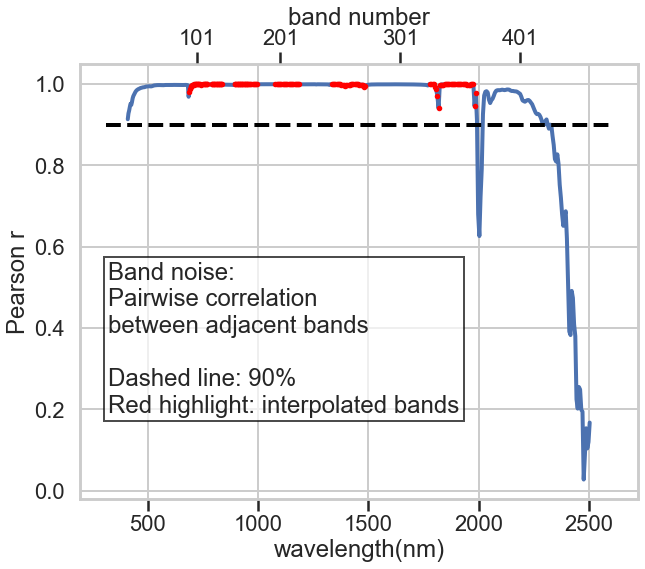

In [35]:
fig, ax = plt.subplots()
ax.plot(wavelengths[:-1], bd2bdcorr, lw=4)
ax.scatter(interp_wav, bd2bdcorr[interp-1], color='red', marker='.', s=50, zorder=2)
ax.hlines(y=0.9, xmin=wavelengths[0]-100, xmax=wavelengths[-1]+100, colors='black', linestyles='--', lw=4)
ax.set_xlabel("wavelength(nm)")
ax.set_ylabel("Pearson r")
ax_top = ax.twiny()
ax_top.set_xticks(wavelengths[99::100])
ax_top.set_xticklabels(corr_full.columns[100::100])
ax_top.set_xbound(ax.get_xbound())
ax_top.grid(False)
ax_top.set_xlabel("band number")
text = ax.text(0.05,.2,
        ("Band noise:\nPairwise correlation\nbetween adjacent bands\n\n"
        "Dashed line: 90%\nRed highlight: interpolated bands"),
        horizontalalignment='left',
        backgroundcolor='w',
        transform=ax.transAxes)
text.set_bbox(dict(facecolor='white', alpha=0.7, edgecolor='black'))

In [36]:
fig.savefig(outdir_figs / "figure4c.png", dpi=200, bbox_inches='tight')

----

In [20]:
interp - 1

array([ 88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100,
       101, 102, 103, 104, 108, 109, 110, 111, 112, 113, 114, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
       165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
       178, 179, 180, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204,
       205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 242, 243,
       244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256,
       257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269,
       270, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335,
       336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348,
       349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361,
       362])

The eligible bands are those bands that are _neither_ noisy (r<0.9) _nor_ interpolated:

In [24]:
preselected = np.array(sorted(list(set(np.where(bd2bdcorr > 0.9)[0]).difference(set(interp-1))))) + 1
preselected

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88, 106, 107, 108,
       116, 117, 118, 119, 120, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 182, 183, 184, 185,
       186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 217, 218, 219,
       220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232,
       233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 272, 273, 274,
       275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287,
       288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 29

---

In [25]:
str_idx = [str(item) for item in preselected]
corr_for_BCA = full_df[str_idx].corr()
corr_for_BCA

,1,2,3,4,5,6,7,8,9,10,...,414,415,416,417,418,420,421,422,423,425
1,1.000000,0.913765,0.916863,0.916233,0.917917,0.916364,0.908498,0.903645,0.902522,0.902416,...,0.291288,0.292338,0.293634,0.293311,0.295668,0.286349,0.288362,0.298584,0.296267,0.289490
2,0.913765,1.000000,0.928126,0.929434,0.929405,0.930726,0.921822,0.919195,0.918806,0.919226,...,0.292713,0.293785,0.296575,0.295929,0.296917,0.287814,0.288446,0.297490,0.297458,0.289845
3,0.916863,0.928126,1.000000,0.935211,0.939351,0.938405,0.928303,0.926414,0.926329,0.926320,...,0.299143,0.300409,0.302590,0.302000,0.304463,0.293687,0.296501,0.307262,0.305525,0.297758
4,0.916233,0.929434,0.935211,1.000000,0.944268,0.944609,0.940151,0.940003,0.940479,0.940672,...,0.319616,0.320318,0.322386,0.322244,0.323524,0.312278,0.315510,0.325238,0.324285,0.316370
5,0.917917,0.929405,0.939351,0.944268,1.000000,0.951855,0.946261,0.945883,0.948031,0.949191,...,0.324589,0.326703,0.328658,0.329316,0.329273,0.318640,0.321668,0.332180,0.331860,0.321433
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.286349,0.287814,0.293687,0.312278,0.318640,0.328408,0.343583,0.356787,0.361106,0.361994,...,0.907846,0.907294,0.907934,0.907334,0.904442,1.000000,0.900030,0.904073,0.904243,0.894140
421,0.288362,0.288446,0.296501,0.315510,0.321668,0.330854,0.347162,0.359100,0.363417,0.364186,...,0.912334,0.912042,0.912641,0.912010,0.907655,0.900030,1.000000,0.909148,0.909184,0.898042
422,0.298584,0.297490,0.307262,0.325238,0.332180,0.340339,0.358640,0.369360,0.374562,0.373328,...,0.915457,0.918520,0.917822,0.916182,0.913977,0.904073,0.909148,1.000000,0.913250,0.902983
423,0.296267,0.297458,0.305525,0.324285,0.331860,0.340720,0.356939,0.370413,0.375596,0.375117,...,0.916865,0.918241,0.916977,0.917006,0.912958,0.904243,0.909184,0.913250,1.000000,0.903933


In [26]:
N = 40   # how many bands we want
selected = []

In [27]:
sel = (1/(len(corr_for_BCA) - 1) * corr_for_BCA.sum(axis=1)).idxmax()
selected = [sel]

while len(selected) < N:
    sel = (1/(len(corr_for_BCA) - len(selected) - 1) * corr_for_BCA.drop(columns=selected).sum(axis=1) 
        - 1/len(selected) * corr_for_BCA[selected].sum(axis=1)).idxmax()
    print(sel)
    selected.append(sel)

10
230
88
239
364
107
71
314
413
40
183
371
6
218
48
323
417
106
84
319
284
20
236
62
315
153
370
27
304
414
42
188
86
299
283
8
239
425
106


In [28]:
list(map(int, selected))

[282,
 10,
 230,
 88,
 239,
 364,
 107,
 71,
 314,
 413,
 40,
 183,
 371,
 6,
 218,
 48,
 323,
 417,
 106,
 84,
 319,
 284,
 20,
 236,
 62,
 315,
 153,
 370,
 27,
 304,
 414,
 42,
 188,
 86,
 299,
 283,
 8,
 239,
 425,
 106]

In [ ]:
selected_idx = [int(item)-1 for item in selected]
selected_idx

[281,
 9,
 229,
 87,
 238,
 363,
 106,
 70,
 313,
 412,
 39,
 182,
 370,
 5,
 217,
 47,
 322,
 416,
 105,
 83,
 318,
 283,
 19,
 235,
 61,
 314,
 152,
 369,
 26,
 303,
 413,
 41,
 187,
 85,
 298,
 282,
 7,
 238,
 424,
 105]

In [ ]:
outdir = Path("/Volumes/FIREICE/fiboreal/cwaigl/2021-HySpex_fuels/HySpex_data_extracted/")
with open(outdir / "bca_bands.txt", 'w') as file:
    file.write("# Band Correlation Analysis: band indices (start at 1) for bands selected, in order of selection\n") 
    file.write('\n'.join(map(str, selected)))

In [ ]:
'\n'.join(map(str, selected))

'282\n10\n230\n88\n239\n364\n107\n71\n314\n413\n40\n183\n371\n6\n218\n48\n323\n417\n106\n84\n319\n284\n20\n236\n62\n315\n153\n370\n27\n304\n414\n42\n188\n86\n299\n283\n8\n239\n425\n106'